# HW2

## Question #1

For this question, we are going to use a data set of [the top grossing movies between 2007 and 2011](https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv).

1. Ingest the data as a pandas data frame.

2. Inspect the data and explain what it contains.

3. Count how many top grossing movies each studio made between 2007 and 2011, and visualize it as a bar chart.

4. Convert your bar chart above into a pie chart.

5. Make a cross-tabulation of Genres against the Year, and observe that the data contains errors. Correct the errors using 'replace' method then cross-tabulate again.

6. Draw a 'heat-map' of the corrected cross-tabulation you got above.

__Importing modules.__

As usual we start off by importing the modules we are going to need further along the homework. Let me explain why we need each module briefly:
1. _pandas_: the be all, end all framework for working with datasets. needs no further explanation.
2. *numpy*: numpy is only used in one cell for creating an array to be passed to the pie chart method from matplotlib.
3. *matplotlib*: the main theme of this homework seems to be visualizing data, matplotlib is as simple as it gets.
4. *seaborn*: a more robust module to visualize data compared to matplotlib used to draw a heat-map.
5. *networkx*: used for visualizing the most popular routes for flights as a graph.
6. *Counter*: very handy function from the built-in collections module, the name is quite self-explanatory.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from collections import Counter

__Ingesting the data.__

Pretty regular stuff, using the _read_csv_ function from _pandas_ to read from the url. 



In [68]:
data = pd.read_csv('https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv')
data

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


**Evaluating the data.**

The dataset has 77 datapoints all containing 8 fields all of which are movies and some metrics about them. All of the movies in the dataset are the one of the highest grossing movies of their years.

**Query for the movies made between 2007 and 2011.**

Since the question specificied the timeframe, I queried for the data points with respect to the condition. Turns out all of the datapoints already satisfy the condition.

In [4]:
data.loc[(data['Year'] >= 2007) & (data['Year'] <= 2011)]

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


**Which studio has had the most blockbusters?**

Next, I used the *Counter* function to count the number of movies that made it to this list with respect to their lead studio.

In [5]:
blockbusters = Counter(data['Lead Studio'])
blockbusters

Counter({'The Weinstein Company': 3,
         'Independent': 19,
         'Disney': 8,
         'Fox': 6,
         '20th Century Fox': 2,
         'Warner Bros.': 14,
         'Summit': 5,
         'Paramount': 4,
         'CBS': 1,
         'New Line': 1,
         'Sony': 4,
         'Universal': 8,
         'Lionsgate': 2})

<BarContainer object of 13 artists>

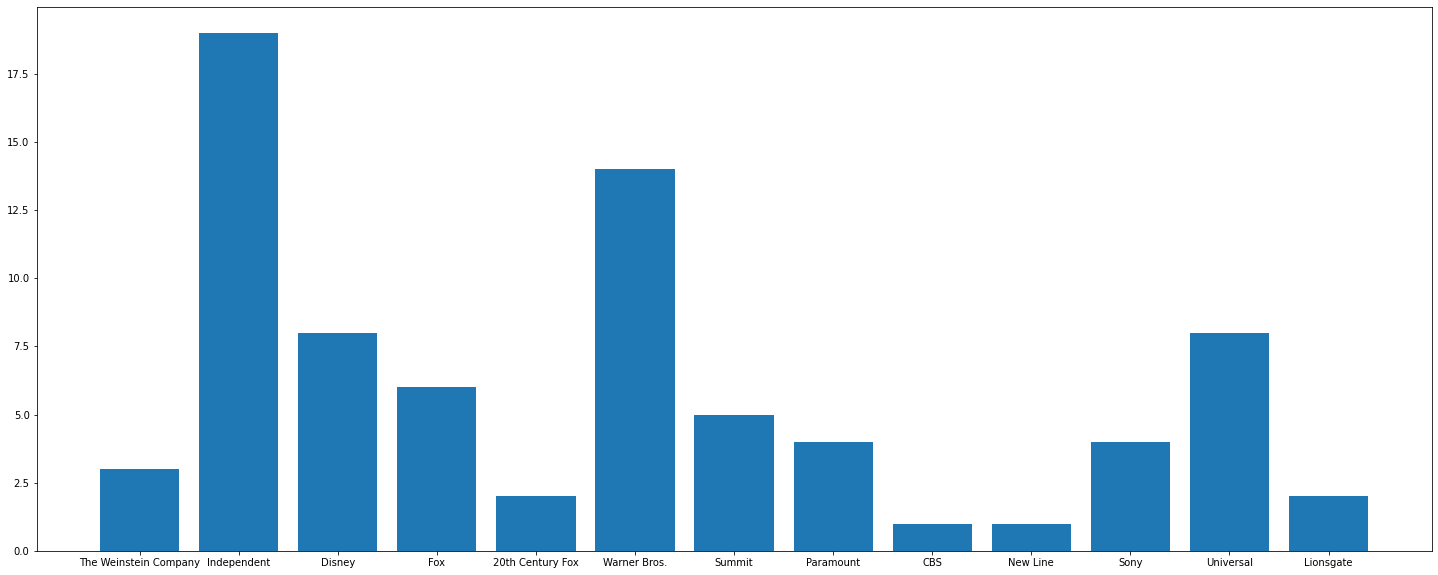

In [69]:
labels = list(blockbusters.keys())
vals = blockbusters.values()
plt.rcParams['figure.figsize'] = 25, 10
plt.bar(labels, vals)

**Drawing conclusions from the chart.**

Ironically, independent studios seem to be the **lead** studio of this race. This can probably be explained by the sheer count of studios bundled together into one category. Other than that, Warner Bros. seem to be the most successful single studio between the years of 2007-2011. Some other honorable mentions are Disney, Fox, Universal, Sony, Summit and Paramount.

**Creating a pie chart for the same data.**

I used the *numpy arrays* to convert the raw values to fractions of 100, to create the values list to be passed onto the *plt.pie** function.

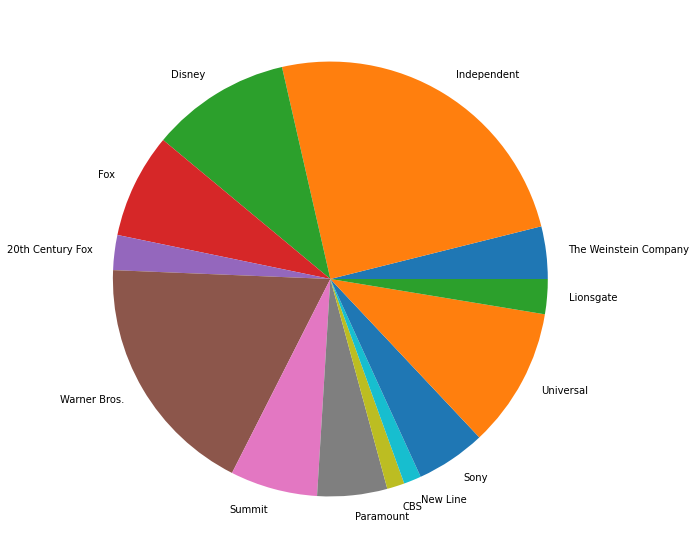

In [70]:
vals_pie = 100 * np.array(list(vals))/sum(vals)
plt.pie(vals_pie, labels=labels);

**Cross tabulation of Genre against Year.**

Cross tabulation is a valuable way to display data since it makes it easier for us to see some trends or other statistics. However when it comes to this dataset there was a minor caveat as mentioned in the question, some datapoints had typos in their *genre* field. I made an initial cross-tab found out which typos were made and replaced them with the proper genre name using the *replace* method provided by non-other than *pandas*.

In [72]:
data['Genre'] = data['Genre'].replace({'Comdy':'Comedy', 'comedy':'Comedy', 'romance':'Romance', 'Romence':'Romance'})

In [73]:
cross = pd.crosstab(data['Genre'], data['Year'])
cross

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comedy,6,13,7,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,5,2,0,0,8


**Drawing conclusions from the cross tabulation.**

Comedy, by far, seems to be highest grossing genre over all 5 years, followed by drama and romance. Other 3 seem to be random when it comes to making blockbusters in a given year.

<AxesSubplot:xlabel='Year', ylabel='Genre'>

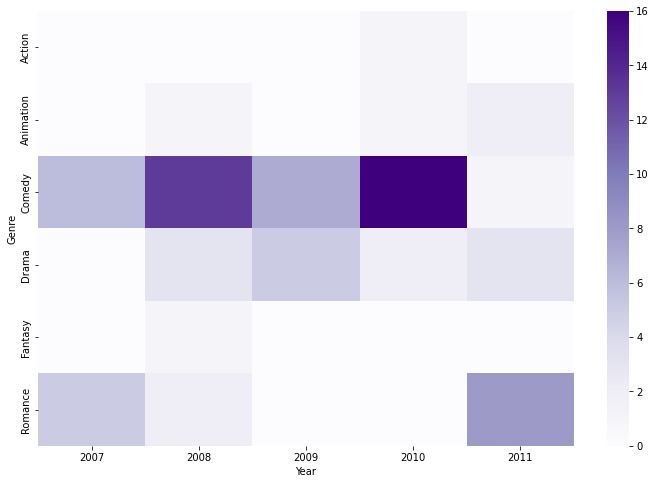

In [10]:
plt.rcParams['figure.figsize'] = 12,8
sns.heatmap(cross, cmap='Purples')

## Question #2

For this question, we are going to use the [Open Flight Data](https://openflights.org/data.html#route).

1. Find the link for the data from the link I gave above. Ingest it as a pandas data frame.

2. Inspect it and explain what it contains.

3. Construct a data frame that contains 3 columns: source airport, target airport and the number of flights from source to target.

4. Filter the data frame and select only the routes that has 10 or more flights between them.

5. Construct a network using the `networkx` library that I used in our last lecture using the data frame you constructed in the previous step.

6. Visualize the network.

**Ingesting the data.**

In [74]:
raw = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat')
raw

,2B,410,AER,2965,KZN,2990,Unnamed: 6,0,CR2
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67657,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67658,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67659,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67660,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


**Inspection of the raw data.**

This dataset is definitely not as clean as the last one, therefore will need some touchups. The main issue that I see here is that the .csv file does not contain any field names to be used as columns in the *dataframe*. First off we are going to deal with this using the *names* parameter of the *read_csv* method. This way the columns will be names properly following the convention provided by **openflights** in the link, and since we won't need any other columns besided *Source Airport* and *Target Airport* I will drop the other columns using the *usecols* parameter when calling the data.

In [75]:
raw = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat', names=['Airline', 'Airline ID', 'Source', 'Source airport ID', 'Target', 'Destination airport ID', 'Codeshare', 'Stops', 'Equipment'], usecols=['Source', 'Target'])
raw

,Source,Target
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB
...,...,...
67658,WYA,ADL
67659,DME,FRU
67660,FRU,DME
67661,FRU,OSS


**Counting how many times a trip was made from x to y for each (x,y).**

I did this as we learned in class where a zipper object was created with both the list of sources and their respective targets, which was then passed onto the infamous *Counter* function. Then I created a dataframe with 3 fields: Source, Target and the count of trips made between them.

In [76]:
zipper = zip(raw.Source, raw.Target)
data_as_dict = Counter(zipper)
trip_count = list(data_as_dict.values())
source, target = zip(*(data_as_dict.keys()))

data = pd.DataFrame({'Source': source, 'Target': target, 'TripCount': trip_count})
data

,Source,Target,TripCount
0,AER,KZN,1
1,ASF,KZN,1
2,ASF,MRV,1
3,CEK,KZN,1
4,CEK,OVB,2
...,...,...,...
37590,TSV,WIN,1
37591,WGA,MEL,1
37592,WIN,LRE,1
37593,WIN,TSV,1


**Trimming the unpopular routes**

As the question demands I queried the source-target routes which were used more than 10 times and recorded it in a new dataframe.

In [78]:
data_g10 = data.loc[data['TripCount'] >= 10]
data_g10

,Source,Target,TripCount
379,BKK,SIN,10
387,KUL,SIN,10
402,SIN,KUL,10
609,CGO,HGH,10
650,CKG,XIY,10
...,...,...,...
14209,HKG,BKK,12
22434,CGK,SIN,10
22466,DPS,SIN,10
22533,SIN,CGK,10


**Drawing a network from the data.**

Using the networkx library I drew the routes with more than 10 flights made as a graph, G(Airport, Route).

In [15]:
edges = pd.DataFrame({'source': data_g10.Source, 'target': data_g10.Target})
edges

,source,target
379,BKK,SIN
387,KUL,SIN
402,SIN,KUL
609,CGO,HGH
650,CKG,XIY
...,...,...
14209,HKG,BKK
22434,CGK,SIN
22466,DPS,SIN
22533,SIN,CGK


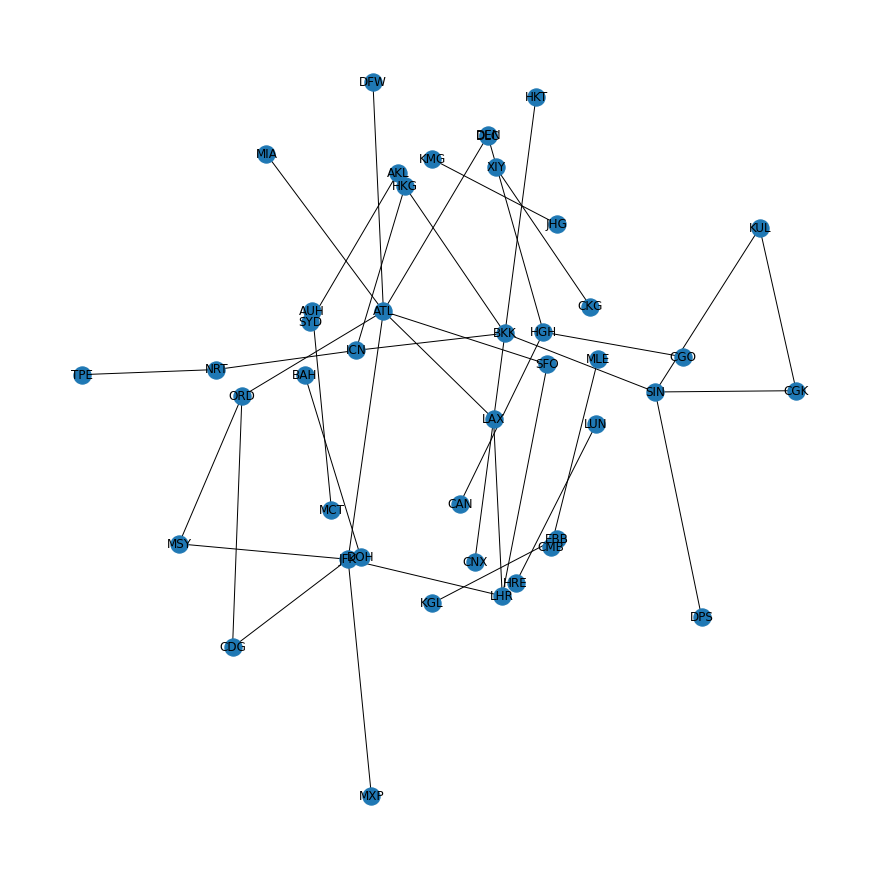

In [16]:
plt.rcParams['figure.figsize'] = 12, 12
graph = nx.from_pandas_edgelist(pd.DataFrame(edges))
nx.draw_kamada_kawai(graph, with_labels=True)

## Question #3

For this question we are going to use the [NBA Data](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/) that I have shown you in our last lecture.

1. Ingest the 2019 data as a pandas data frame.

2. Inspect it and explain what it contains.

3. Write a function that takes two arguments: the NBA data frame and a 'game type' argument which can be 'regular' or 'playoff'. The function must return another pandas data frame of list of players, the number of asists, blocks and rebounds for each player. Evaluate your function on both regular games, and then on playoff games.

4. Write another function that takes two argumentas as before: the NBA data frame and the game type. The function must return the list of teams and the number of wins during the regular season or the play offs as a data frame. Visualize the returned data frame as a bar chart for both regular games, and then on playoff games.

**Ingesting the data.**

In [79]:
raw = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2019-20_pbp.csv')
raw

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539260,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,29,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539261,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,20,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539262,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,15,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539263,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,0,LAL,End of 4th quarter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Some resource issues.**

This dataset is absurdly large and my laptop is not the latest and greatest. I downlaoded this enormous dataset to my local and worked on it that way, however I know that files are not secure as a medium to get data in code so I'm going to replace the file path with the url hopefully you will be able to get the dataset directly from the url.

**Evaluating the raw data.**

The raw data is enormous as I stated standing at 539265 rows and 41 columns, so next I am going to take a look at the columns to see which ones are going to be of utility to me. At first sight the dataset seems to be containing every play made in the regular season and the playoffs whether it be free throws,m 3-pointers or rebounds.

In [80]:
raw.columns

Index(['URL', 'GameType', 'Location', 'Date', 'Time', 'WinningTeam', 'Quarter',
       'SecLeft', 'AwayTeam', 'AwayPlay', 'AwayScore', 'HomeTeam', 'HomePlay',
       'HomeScore', 'Shooter', 'ShotType', 'ShotOutcome', 'ShotDist',
       'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder',
       'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam',
       'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame',
       'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause',
       'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer',
       'JumpballPoss', 'Unnamed: 40'],
      dtype='object')

**41 columns! What do they encapsulate in each row?**

As I speculated in the previous cell, the dataset contains every single play made in the season from shot distance to the second remaining on the clock.

**Writing a function to parse player stats.**
Now we are going to construct a function following the orders given in the question. *player_stats()* function takes two parameters: *data* and *game_type* where data is the raw dataset and *game_type* is either 'regular' or 'playoff'. The function returns a dataframe indexed with *Player Names* containing three other columns: *Assists*, *Rebounds* and *Blocks*

In [19]:
def player_stats(data, game_type = 'regular'):
    data = raw[['GameType', 'Assister', 'Blocker', 'Rebounder']].dropna(thresh=2)

    gt_data = data.loc[data.GameType == game_type]

    assists = dict(Counter(gt_data['Assister']))
    rebounds = dict(Counter(gt_data['Rebounder']))
    blocks = dict(Counter(gt_data['Blocker']))


    stats_nan = pd.DataFrame({'Assists': assists, 'Rebounds': rebounds, 'Blocks': blocks})
    stats = stats_nan.drop(stats_nan.index[0])
    return stats

In [20]:
player_stats(raw)

,Assists,Rebounds,Blocks
F. VanVleet - vanvlfr01,357.0,203.0,17.0
B. Ingram - ingrabr01,259.0,380.0,38.0
J. Holiday - holidjr01,408.0,293.0,48.0
L. Ball - balllo01,437.0,383.0,38.0
P. Siakam - siakapa01,207.0,439.0,53.0
...,...,...,...
D. Hannahs - hannadu01,NaN,1.0,NaN
J. Uthoff - uthofja01,NaN,6.0,NaN
T. Zeller - zellety01,NaN,4.0,NaN
K. Alexander - alexaky01,NaN,3.0,NaN


In [81]:
player_stats(raw, game_type='playoff')

,Assists,Rebounds,Blocks
D. Mitchell - mitchdo01,34.0,35.0,2.0
J. Murray - murraja01,126.0,92.0,6.0
J. Ingles - inglejo01,33.0,24.0,1.0
N. Jokić - jokicni01,109.0,187.0,15.0
M. Porter - portemi01,16.0,127.0,6.0
...,...,...,...
A. Cleveland - clevean01,NaN,1.0,NaN
C. Clemons - clemoch01,NaN,2.0,NaN
C. Edwards - edwarca01,NaN,1.0,NaN
T. Horton-Tucker - hortota01,NaN,5.0,NaN


**The other function.**

Now let's construct another function similar to *player_stats* but now we have to parse the win count of each team in the regular seasons or the playoffs depending on the *game_type* parameter passed to the function

In [53]:
def team_stats(raw, game_type = 'regular'):
    data = raw[['GameType', 'WinningTeam','AwayPlay']]
    data_eog = data.loc[(data['AwayPlay'] == 'End of Game') & (data['GameType'] == game_type)]

    count = dict(Counter(data_eog['WinningTeam']))
    win_per_team = pd.DataFrame({'Team': count.keys(), 'TotalWins': count.values()})
    return win_per_team

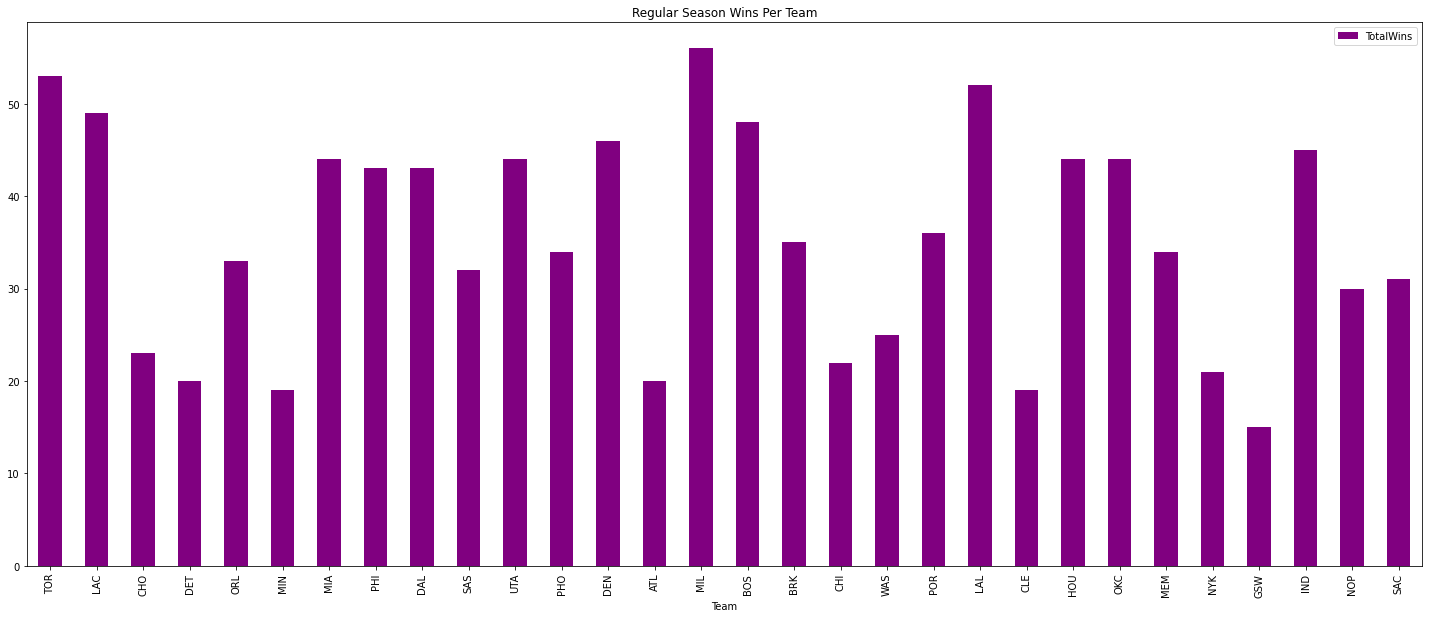

In [82]:
team_data = team_stats(raw)
ax = team_data.plot.bar(x='Team', y='TotalWins', title='Regular Season Wins Per Team', color='Purple')

**Regular Season: The Greek Freak.**

As it can be seen from the bar chart Milwaukee Bucks had the most wins in the regular season thanks to their superstar Giannis Antetokounmpo.

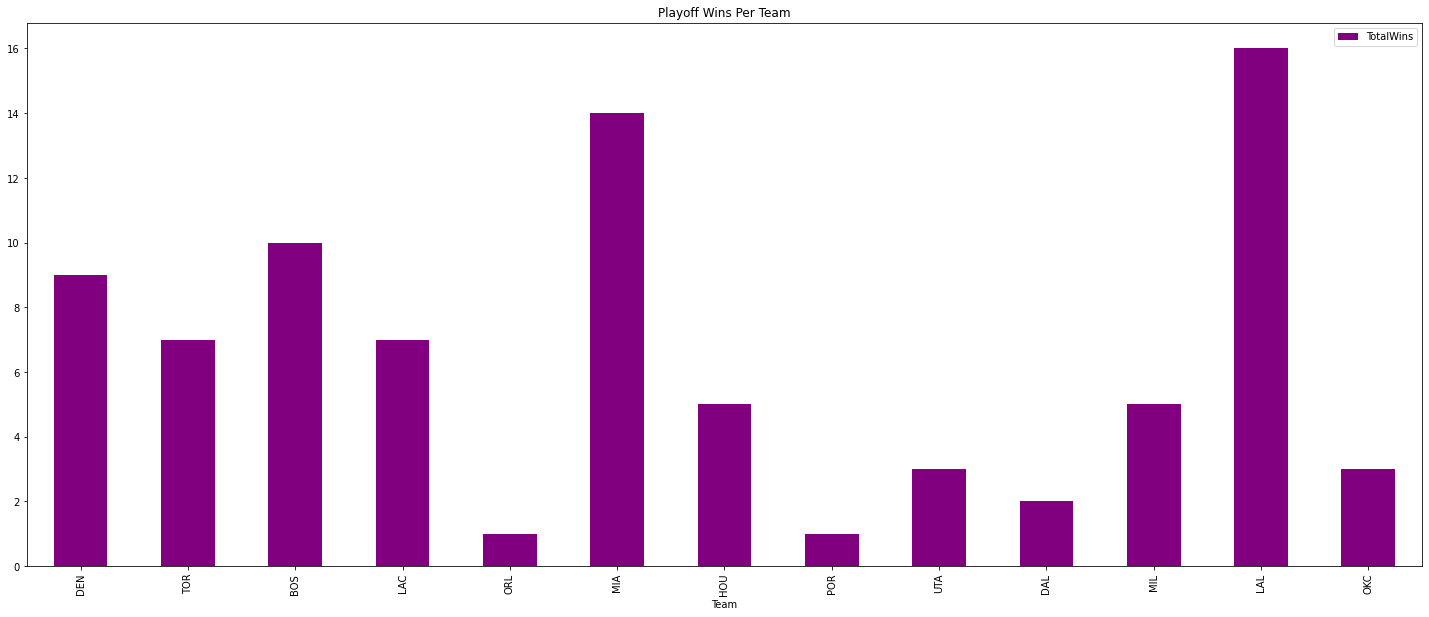

In [83]:
team_data_po = team_stats(raw, game_type='playoff')
ax = team_data_po.plot.bar(x='Team', y='TotalWins', title='Playoff Wins Per Team', color='Purple')

**Playoffs: King James, The Legacy**

As a full-time NBA fan who watched the entire 2020 playoffs, I can safely say that bar chart does not do enough justice to what LeBron has achieved at age 35. It pained me to see my favorite player Jimmy Butler to go down at the finals after putting his heart on his sleeve for a mind-blowing 47 minutes played and clinching a win. I thoroughly enjoyed working with this dataset since I'm really invested in NBA, thank you for the great selection!